***Created By: Azizi Bin Mohamad Tambi***

**Matric No: 1919661**

# **ASSIGNMENT 1**

*By using google colab code to access your webcam, capture three different facial expressions of yourself.*

A) Apply both Canny Edge Detection and Sobel Edge Detection to only the face area of the image using a suitable threshold values. (5 Marks)

B) Perform blurring of only faces in those images. (5 Marks)

C) Calculating the number of coins in an image using contours. (5 Marks)

# **ASSIGNMENT 1A**

Apply both Canny Edge Detection and Sobel Edge Detection to only the face area of the image using a suitable threshold values. (5 Marks)

In [118]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [119]:
def take_photo(filename='Expression_Angry.jpg', quality=1.0):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [120]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))


<IPython.core.display.Javascript object>

NotFoundError: Requested device not found


In [121]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
%matplotlib inline
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/MACHINE VISION WORKSHOP/Assignment 1/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


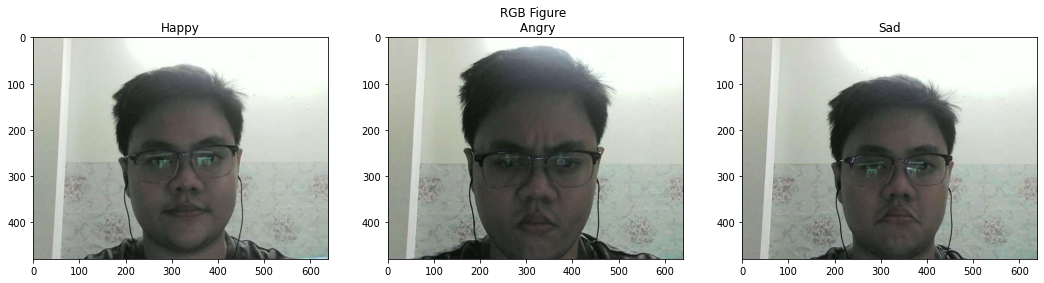

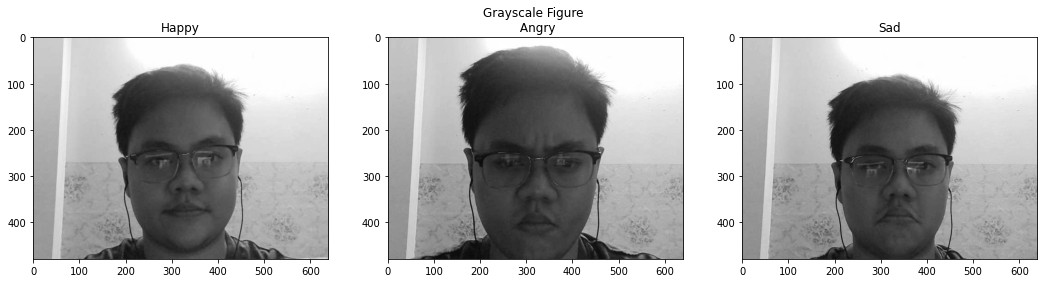

In [122]:
#opening image using openCV2
#for happy expression
img_happy_bgr = cv2.imread(path+"Expression_Happy.jpg",cv2.IMREAD_COLOR)
img_happy_rgb = cv2.cvtColor(img_happy_bgr, cv2.COLOR_BGR2RGB)
happy_gray = cv2.cvtColor(img_happy_rgb, cv2.COLOR_RGB2GRAY)
#for angry expression
img_angry_bgr = cv2.imread(path+"Expression_Angry.jpg",cv2.IMREAD_COLOR)
img_angry_rgb = cv2.cvtColor(img_angry_bgr, cv2.COLOR_BGR2RGB)
angry_gray = cv2.cvtColor(img_angry_rgb, cv2.COLOR_RGB2GRAY)
#for sad expression
img_sad_bgr = cv2.imread(path+"Expression_Sad.jpg",cv2.IMREAD_COLOR)
img_sad_rgb = cv2.cvtColor(img_sad_bgr, cv2.COLOR_BGR2RGB)
sad_gray = cv2.cvtColor(img_sad_rgb, cv2.COLOR_RGB2GRAY)

#Showing all image expression
def plot_expression_rgb():
  plt.figure(figsize=[18,5])
  plt.subplot(131);plt.imshow(img_happy_rgb);plt.title("Happy");
  plt.subplot(132);plt.imshow(img_angry_rgb);plt.title("RGB Figure \n Angry");
  plt.subplot(133);plt.imshow(img_sad_rgb);plt.title("Sad");

def plot_expression_gray():
  plt.figure(figsize=[18,5])
  plt.subplot(131);plt.imshow(happy_gray, cmap='gray');plt.title("Happy");
  plt.subplot(132);plt.imshow(angry_gray, cmap='gray');plt.title("Grayscale Figure \n Angry");
  plt.subplot(133);plt.imshow(sad_gray, cmap='gray');plt.title("Sad");

plot_expression_rgb()
plot_expression_gray()

Using Haar Cascade for Face Detection


In [123]:
#def face_detection(fileName, expression):
face_cascade = cv2.CascadeClassifier(path +"haarcascade_frontalface_alt.xml")
face1 = face_cascade.detectMultiScale(img_happy_rgb, 1.1 , 4)
face2 = face_cascade.detectMultiScale(img_angry_rgb, 1.1 , 4)
face3 = face_cascade.detectMultiScale(img_sad_rgb, 1.1 , 4)

for(x, y, w, h) in face1:
  cv2.rectangle(img_happy_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)
  #crop image
  happy_rgb = img_happy_rgb[y:y + h, x:x +w]
  happy = cv2.cvtColor(happy_rgb, cv2.COLOR_RGB2GRAY)

for(x, y, w, h) in face2:
  cv2.rectangle(img_angry_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)
  angry_rgb = img_angry_rgb[y:y + h, x:x +w]
  angry = cv2.cvtColor(angry_rgb, cv2.COLOR_RGB2GRAY)

for(x, y, w, h) in face3:
  cv2.rectangle(img_sad_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)
  sad_rgb = img_sad_rgb[y:y + h, x:x +w]
  sad = cv2.cvtColor(sad_rgb, cv2.COLOR_RGB2GRAY)


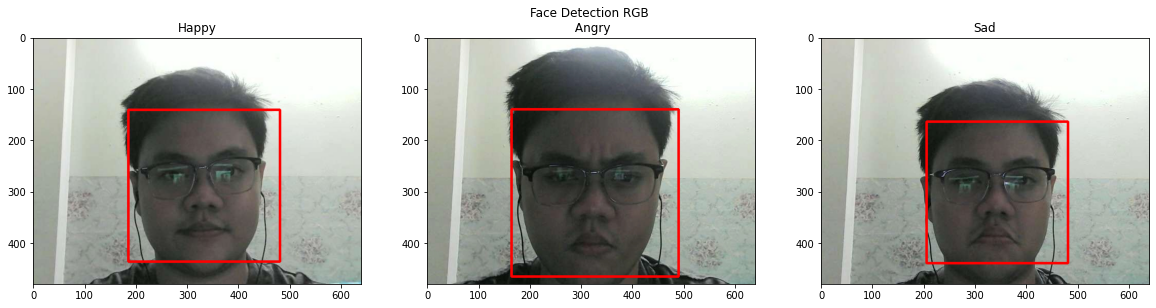

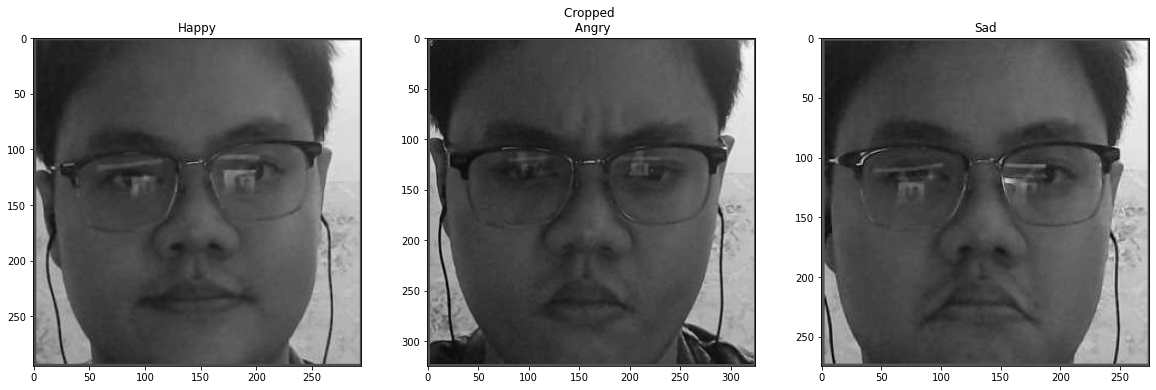

In [138]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(img_happy_rgb);plt.title("Happy");
plt.subplot(132);plt.imshow(img_angry_rgb);plt.title("Face Detection RGB \n Angry");
plt.subplot(133);plt.imshow(img_sad_rgb);plt.title("Sad");

plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(happy, cmap='gray');plt.title("Happy");
plt.subplot(132);plt.imshow(angry, cmap='gray');plt.title("Cropped \n Angry");
plt.subplot(133);plt.imshow(sad, cmap='gray');plt.title("Sad");

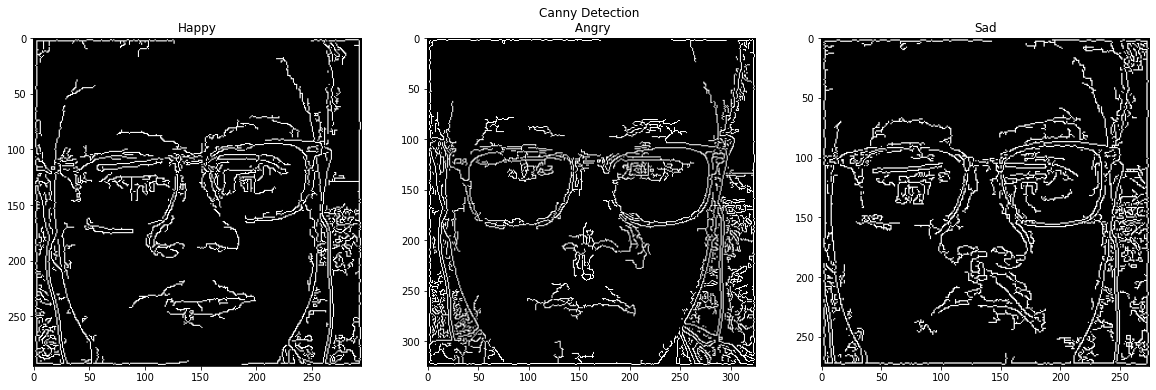

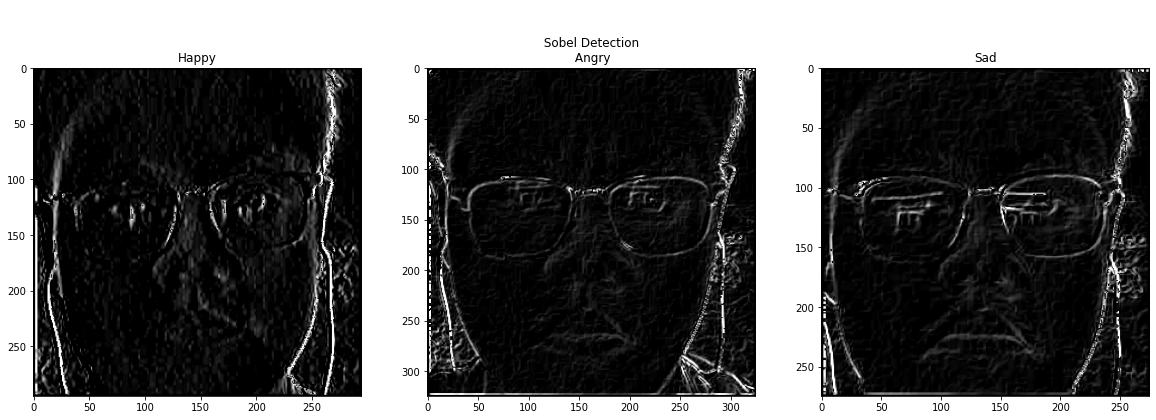

In [125]:
#Canny detection and sobel detection for all expression
def canny_expression(Gx, Gy):
  canny_happy = cv2.Canny(happy,Gx,Gy) #canny for happy expression
  canny_angry = cv2.Canny(angry,Gx,Gy)
  canny_sad = cv2.Canny(sad,Gx,Gy)
  plt.figure(figsize=[20,10])
  #for Canny
  plt.subplot(131);plt.imshow(canny_happy, cmap='gray');plt.title("Happy");
  plt.subplot(132);plt.imshow(canny_angry, cmap='gray');plt.title("Canny Detection \n Angry");
  plt.subplot(133);plt.imshow(canny_sad, cmap='gray');plt.title("Sad");

def sobel_expression(x, y):
  sobel_x_happy = cv2.Sobel(happy, cv2.CV_8U,x,y,ksize=3)
  sobel_y_happy = cv2.Sobel(happy, cv2.CV_8U,x,y,ksize=3)
  sobel_happy = sobel_x_happy + sobel_y_happy
  
  sobel_x_angry = cv2.Sobel(angry, cv2.CV_8U,x,y,ksize=3)
  sobel_y_angry = cv2.Sobel(angry, cv2.CV_8U,y,x,ksize=3)
  sobel_angry = sobel_x_angry + sobel_y_angry

  sobel_x_sad = cv2.Sobel(sad, cv2.CV_8U,x,y,ksize=3)
  sobel_y_sad = cv2.Sobel(sad, cv2.CV_8U,y,x,ksize=3)
  sobel_sad = sobel_x_sad + sobel_y_sad
  #for Sobel
  plt.figure(figsize=[20,10])
  plt.subplot(131);plt.imshow(sobel_happy, cmap='gray');plt.title("Happy");
  plt.subplot(132);plt.imshow(sobel_angry, cmap='gray');plt.title("\n \n Sobel Detection \n Angry");
  plt.subplot(133);plt.imshow(sobel_sad, cmap='gray');plt.title("Sad");

canny_expression(15, 70)
sobel_expression(1,0)

# **Assignment 1B**

Perform blurring of only faces in those images. (5 Marks)

In [126]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
%matplotlib inline
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/MACHINE VISION WORKSHOP/Assignment 1/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


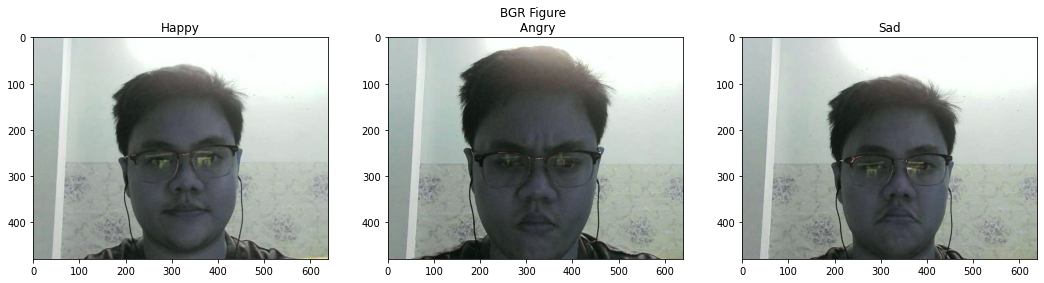

In [139]:
#for happy expression
img_happy_bgr = cv2.imread(path+"Expression_Happy.jpg",cv2.IMREAD_COLOR)
#for angry expression
img_angry_bgr = cv2.imread(path+"Expression_Angry.jpg",cv2.IMREAD_COLOR)
#for sad expression
img_sad_bgr = cv2.imread(path+"Expression_Sad.jpg",cv2.IMREAD_COLOR)

def plot_expression_gray():
  plt.figure(figsize=[18,5])
  plt.subplot(131);plt.imshow(img_happy_bgr);plt.title("Happy");
  plt.subplot(132);plt.imshow(img_angry_bgr);plt.title("BGR Figure \n Angry");
  plt.subplot(133);plt.imshow(img_sad_bgr);plt.title("Sad");

plot_expression_gray()

In [128]:
def face_detection(filename):
  face_cascade = cv2.CascadeClassifier(path +"haarcascade_frontalface_alt.xml")
  face = face_cascade.detectMultiScale(filename, 1.1 , 4)

  for(x, y, w, h) in face:
    cv2.rectangle(filename, (x, y), (x+w, y+h), (0,255,0), 3)
    face_region = filename[y:y + h, x:x + w]
    #blurring image
    blur = cv2.GaussianBlur(face_region, (85,85),0)

    filename[y:y+h, x:x+w] = blur

  #displayImage(img_happy_bgr)

In [129]:
face_detection(img_happy_bgr)
face_detection(img_angry_bgr)
face_detection(img_sad_bgr)

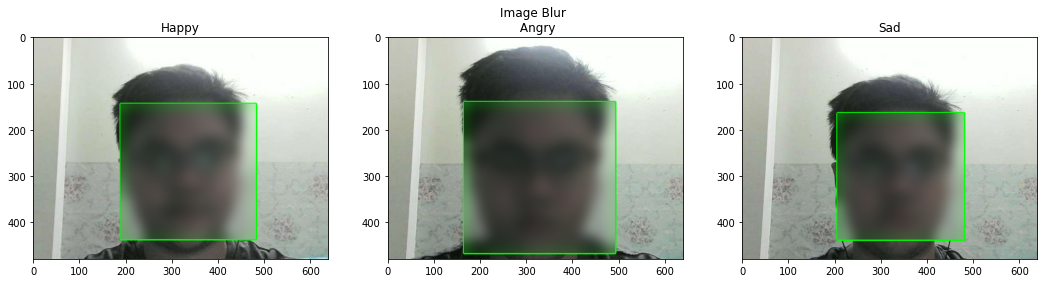

In [130]:
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(cv2.cvtColor(img_happy_bgr, cv2.COLOR_BGR2RGB));plt.title("Happy");
plt.subplot(132);plt.imshow(cv2.cvtColor(img_angry_bgr, cv2.COLOR_BGR2RGB));plt.title("Image Blur \n Angry");
plt.subplot(133);plt.imshow(cv2.cvtColor(img_sad_bgr, cv2.COLOR_BGR2RGB));plt.title("Sad");

# **Assignment 1C**

Calculating the number of coins in an image using contours. (5 Marks)

In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
%matplotlib inline
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/MACHINE VISION WORKSHOP/Assignment 1/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


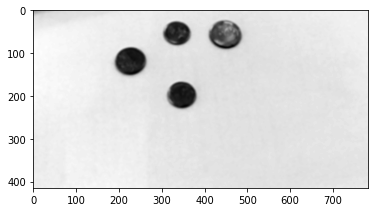

In [132]:
coin = cv2.imread(path+"coin_detection3.jpg", cv2.IMREAD_GRAYSCALE)
coin_blur = cv2.GaussianBlur(coin, (11,11), 0)
coin_blur_canny = cv2.Canny(coin_blur, 20, 160, 3)

plt.imshow(coin_blur, cmap = 'gray')

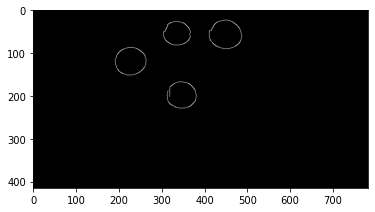

In [133]:
plt.imshow(coin_blur_canny, cmap = 'gray')

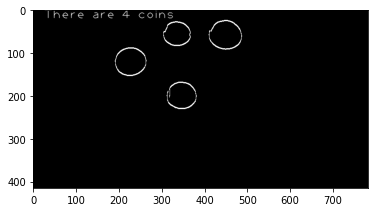

In [134]:
dilated = cv2.dilate(coin_blur_canny, (1,2), iterations = 2)
(cnt, _) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

text = "There are {} coins".format(len(cnt))
font = cv2.FONT_HERSHEY_PLAIN
cv2.putText(dilated, text, (25,20), font, 2, (255, 0, 0), 1, cv2.LINE_AA)

plt.imshow(dilated, cmap = 'gray')

Number of coins in the image: 4 coins


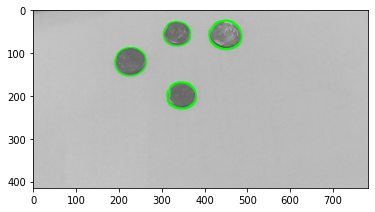

In [140]:
coin_rgb = cv2.cvtColor(coin, cv2.COLOR_GRAY2RGB)
cv2.drawContours(coin_rgb, cnt,-1, (0,255,0), 2)

plt.imshow(coin_rgb)
print("Number of coins in the image:", len(cnt), "coins")